In [2]:
%matplotlib inline

# CNN train and visualize exercise

For this exercise, you should train a CNN model for the CIFAR10 data set on its train set and evaluate it on its test set. You can use every layer that you want. This data set consists of 3x32x32 images, i.e. 3-channel color images of size 32x32. These belong to one of the following classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’.

Further, you should visualize the activations for each hidden layer of your network using t-SNE.


## Report

For the report, please briefly describe the architecture that you used to solve the task, the number of training epochs and the reached accuracy on the test set. Your trained model should be able to reach at least a 50% accuracy.
Furthermore, provide visualizations of the activations of your hidden layers for a test subset of at least 1.000 points.

<strong>Note:</strong> Please use the `exercise_sheet_template.tex` to generate your report. Your report is due on *Friday, March 15th, 10am* as single-page PDF to [aschulz@techfak.uni-bielefeld.de](mailto:aschulz@techfak.uni-bielefeld.de). Please start your e-mail subject with the words *[Deep Learning]*.


In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

## Load and preprocess the data

As before, we can load the data with `torchvision`. At the first call, they are downloaded from the web.

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_s_tr = 64
batch_s_te = 1000

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_s_tr,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_s_te,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Display a few examples

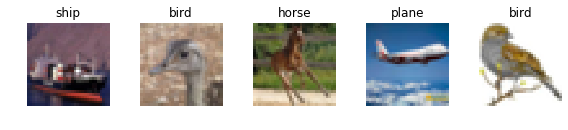

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show some images
num_disp = 5
fig, axes = plt.subplots(1,num_disp, figsize=(8, 6))
for i in range(0, num_disp):
    axes[i].imshow(np.transpose((images[i,:,:,:]/2 + 0.5).numpy(), (1, 2, 0)), vmin=0, vmax=1)
    axes[i].axis('off')
    axes[i].set_title(classes[labels[i].item()])
    
plt.tight_layout()
plt.show()